# Bushfire Analysis using Meteorological Data

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- psych
- GGally
- ggcorrplot
- tidyverse
- caret
- randomForest
- dummies
- e1071

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

In [1]:
#loading libraries
library(psych)
library(GGally)
library(ggcorrplot)
library(tidyverse)
library(caret)
library(randomForest)
library(dummies)
library(e1071)  

Warning message:
"package 'psych' was built under R version 3.6.3"Warning message:
"package 'GGally' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x ggplot2::%+%()   masks psych::%+%()
x ggplot2::alpha() masks psych::alpha()
x dplyr::filter(

## 1. Introduction <a class="anchor" id="sec_1"></a>

Forest fires are the major environmental problem that we are facing now. Australia is one of the countries that are facing this issue which got worse in early 2020. Forest fire is such a disaster that it can destroys thousands of home, burning millions of hecters of land and animal habitats. The most efficient way to identify the area which has chance of burning, so that precausations can be taken in advance.<br>

Traditional methods are inefficient and expensive. So with the help of data, which can predict the burned areas using machine learning. The data consists of 12 features and one target variable. These are the full forms.
* <font color="Blue">FFMC</font>- Fine Fuel Moisture Code
* <font color="Blue">DMC</font>- Duff Moisture Code
* <font color="Blue">DC</font>-  Drought Code
* <font color="Blue">ISI</font>- Initial Spread Index
* <font color="Blue">RH</font>- Relative Humidity<br>
In this assignment, we are going to find the best features to predict the burned area and also compare different machine learning models.


## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In [2]:
# reading the dataset
df <- read.csv("forestfires.csv", header = TRUE, sep = ',' )

In [3]:
#printing the dimensions of dataframe
cat("The dataset contains",dim(df)[1],"rows and",dim(df)[2],"columns")

#first five rows
head(df)

The dataset contains 517 rows and 13 columns

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [4]:
# structure of the dataframe
str(df)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


Since `month` and `day` are categorical variables, rest are all numerical values. While creating model, the categorical values can be converted into numerical using dummy values

In [5]:
# printing the summary of the dataframe
summary(df)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

From the summary of the dataset, the following observations are found out
*  The target variable(area)is showing a large variation, the minimum area burned is shown as 0 and the maximum value is 1090 and the mean is just 12.85 showing that they distribution might be skewed to one side. We have to further investigate it with distribution charts.
* All the columns contains positive values.
* The variations in wind and temperature is less than other factors.
* The values recorded in aug and september is more other months. <br>

Now we are going to find out the distributions of features and target variable.

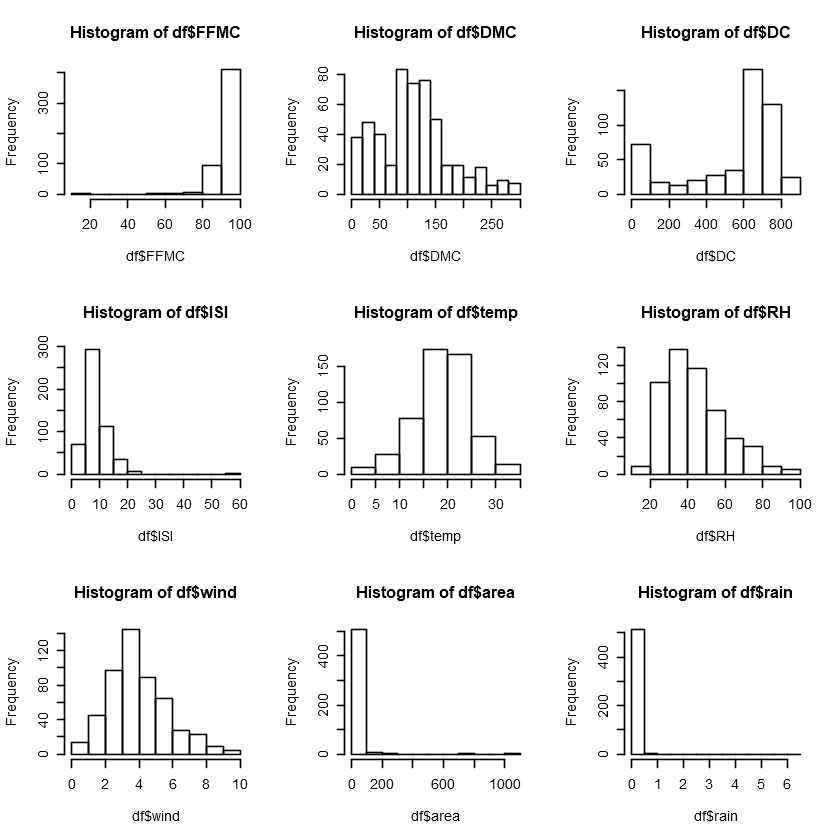

In [6]:
# To plot histograms
par(mfrow=c(3,3))
hist(df$FFMC)
hist(df$DMC)
hist(df$DC)
hist(df$ISI)
hist(df$temp)
hist(df$RH)
hist(df$wind)
hist(df$area)
hist(df$rain)

From the above plots,we can say that
* The target variable is right skewed as most of the values are 0
* rain feature is also skewed towards right, both rain and target variable has similar distribution.
* Wind and relative humidity is slighly right skewed
* Temperature has a near gaussian distribution<br>

All together we can say that we have a mixture of right and left skewness


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] "Skewness of area before taking log: 12.77"

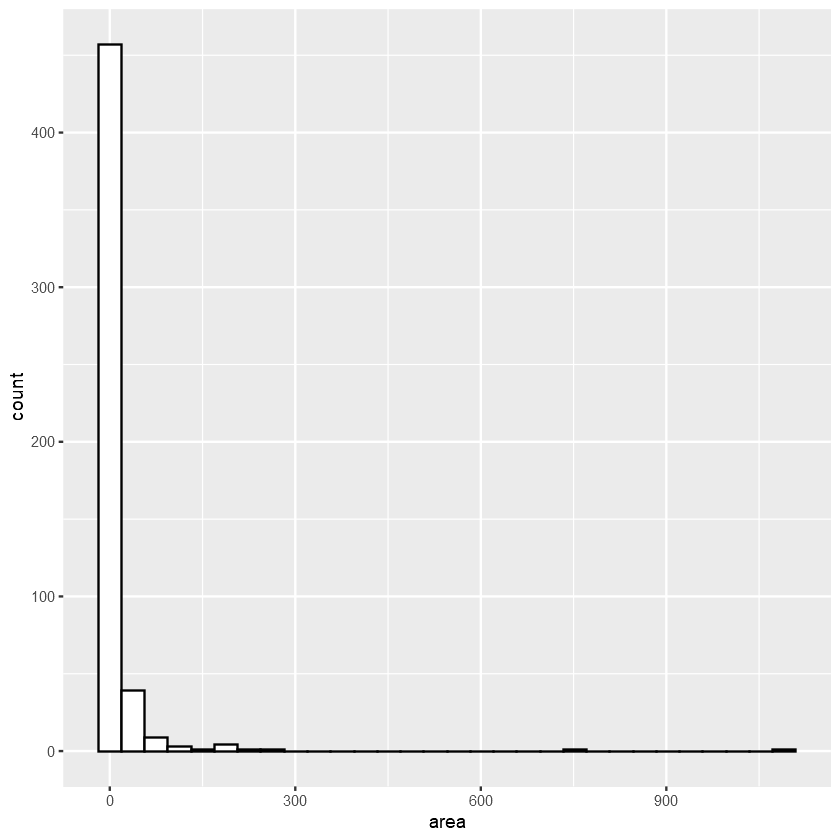

In [7]:
# plotting histogram for area 

ggplot(df, aes(area))+ geom_histogram(colour = "black", fill = "White")

paste("Skewness of area before taking log:",round(skewness(df$area),2))

Since the target area is highly right skewed as most of the values recorded are zero, these can affect our predictions. Therefore we are now going to apply log on the target variable where the area is greater than 0 and see the distribution of it.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 247 rows containing non-finite values (stat_bin)."

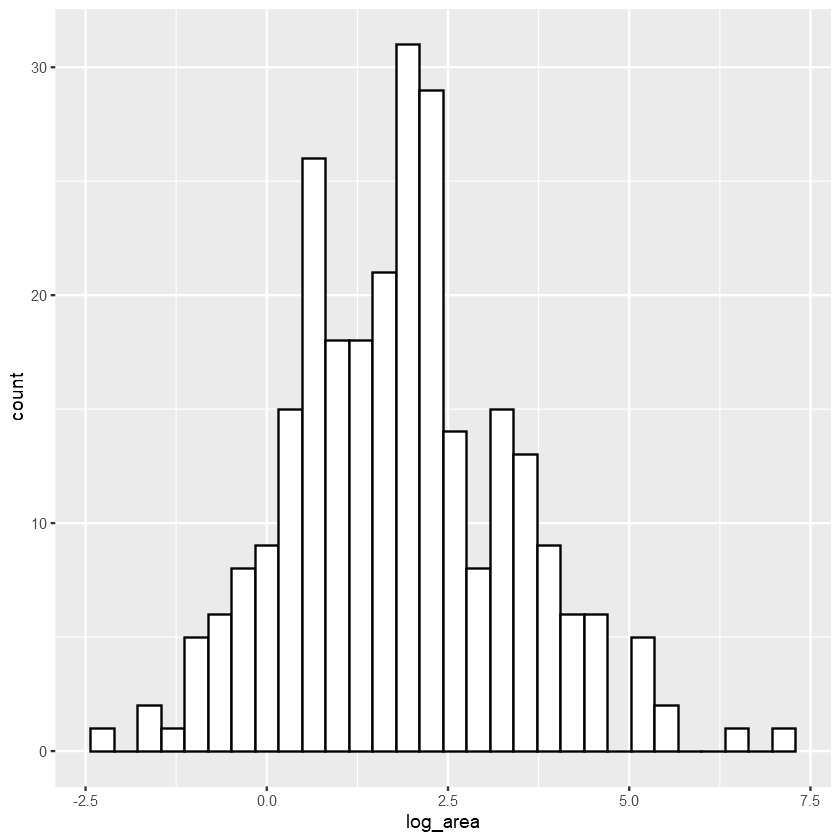

In [8]:
# plotting histogram of are where area is greater than zero

trial_df <- df
trial_df$log_area <- ifelse(trial_df$area>0, log(trial_df$area), NA)

# ggplot libraries to plot
ggplot(trial_df, aes(log_area))+ geom_histogram(colour = "black", fill = "White")

As we assumed when we take all the values greater than 0 in area, we are getting a normal distribution. But then, we are not making use of all the data which is given in dataset. The lack of data point can cause underfitting to our model. So we are going to add one to the target variable which has zero values and then see how the distribution goes.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] "Skewness after taking log: 1.24"

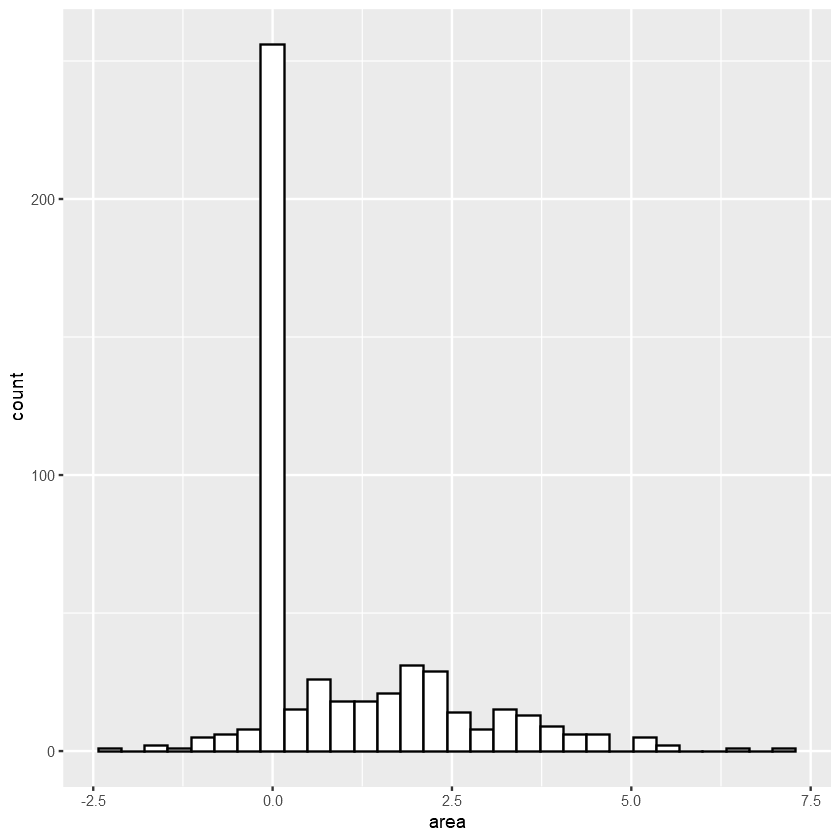

In [9]:
# to plot histogram of log(area)
trial_df <- df
trial_df$area <- ifelse(trial_df$area==0, (trial_df$area+1), trial_df$area)
trial_df$area <- log(trial_df$area)

# ploting distribution
ggplot(trial_df, aes(area))+ geom_histogram(colour = "black", fill = "White")
paste("Skewness after taking log:",round(skewness(trial_df$area),2))

We can now see that the distribution is even better. We can see that the skewness of the variable has reduced.

ggplot(df, aes(rain))+ geom_histogram(colour = "black", fill = "White")

In [10]:
trial_df <- df
trial_df$rain <- sqrt(trial_df$rain)
# ploting distribution
# ggplot(trial_df, aes(rain))+ geom_histogram(colour = "black", fill = "White")
skewness(df$rain)
skewness(trial_df$rain)

[1] 19.7015

[1] 12.42046

We need to check if relation between month and day with area

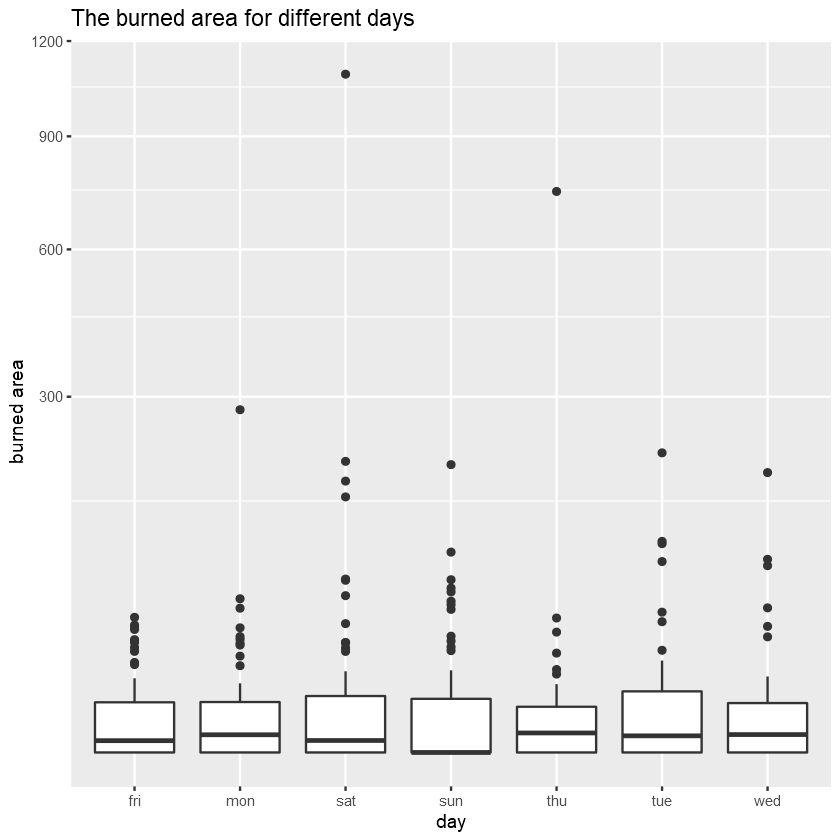

In [11]:
ggplot(df, aes(day, area)) + geom_boxplot() + coord_trans(y = "sqrt") + labs(x = "day", y = "burned area", title ="The burned area for different days")

There is no much relation between day and area burned. The mean of area burned are almost the same for all. Lets see if there are any relation between month and area burned

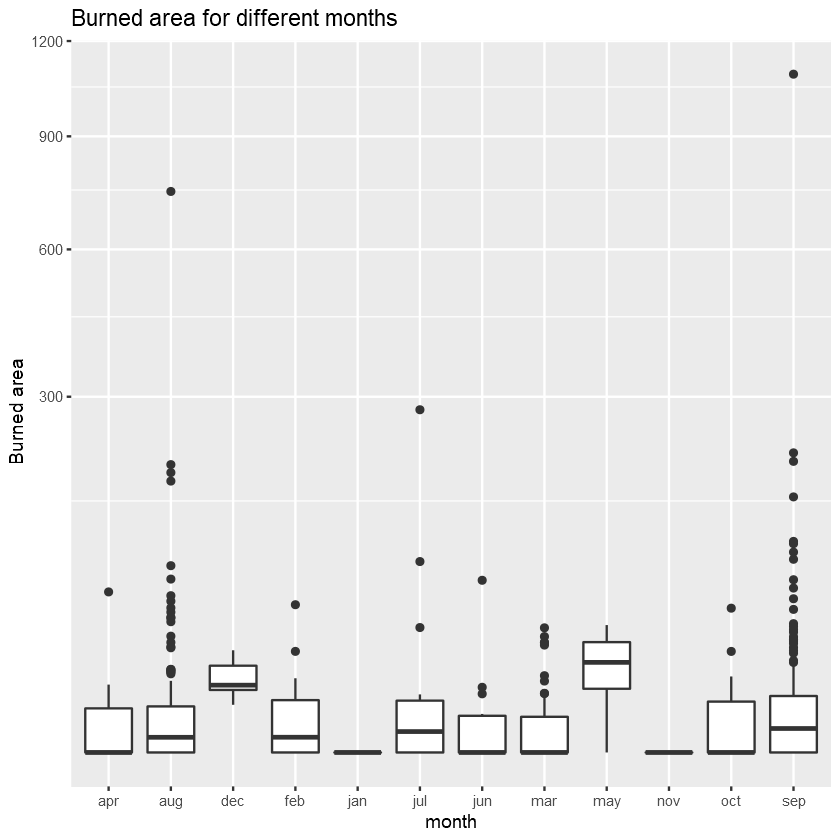

In [12]:
ggplot(df, aes(month, area)) + geom_boxplot() + coord_trans(y = "sqrt") + xlab("month") + ylab("Burned area")+ ggtitle("Burned area for different months")

More area burned cases have been reported in september and august. This means that month has relation with burned area.

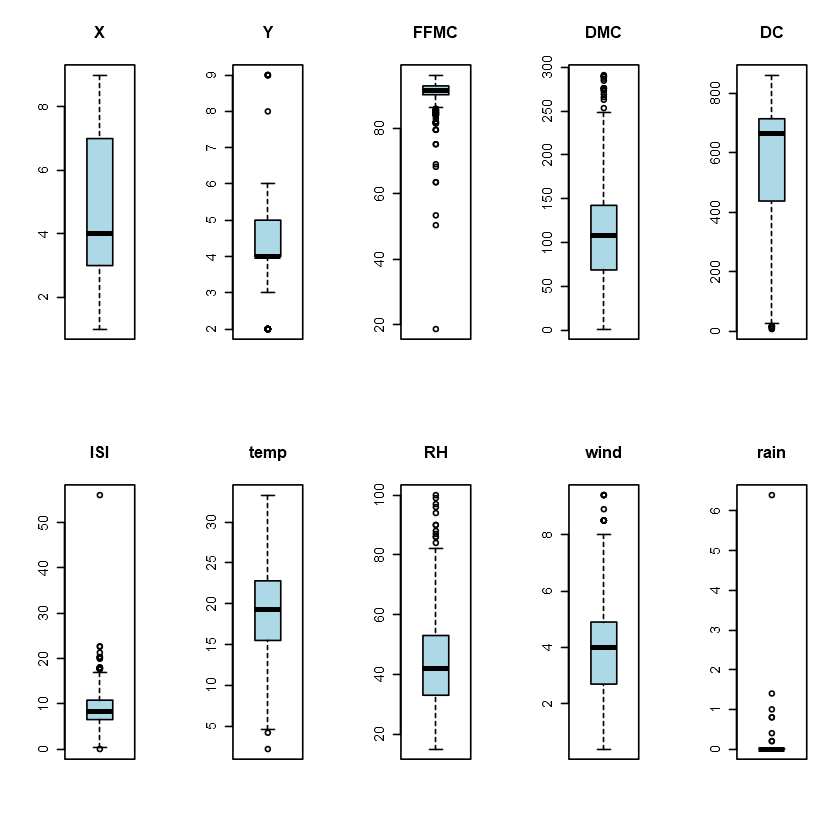

In [13]:
#plotting box plots
par(mfrow=c(2,5)) 

df_boxplot <- df[c(-3,-4)]

#plotting boxplot for every attribute
for (l in 1:(length(df_boxplot) - 1)) {
        boxplot(df_boxplot[,l], main = names(df_boxplot[l]), type="l", col = 'light blue') 
}

Boxplot shows outliers, mean and distribution on different columns 

Now we are going to plot correlation plot to find the correlation between different variables. It is imporatant to find correlation because we need to remove the feature that are highly correlated.ie , we must not use two highly correlated features.<br>
Eventhough correlation does not mean causation, a features must have some level of correlation with the target variable.<br> With this correlation chart we can discard features with no correlation with the target.

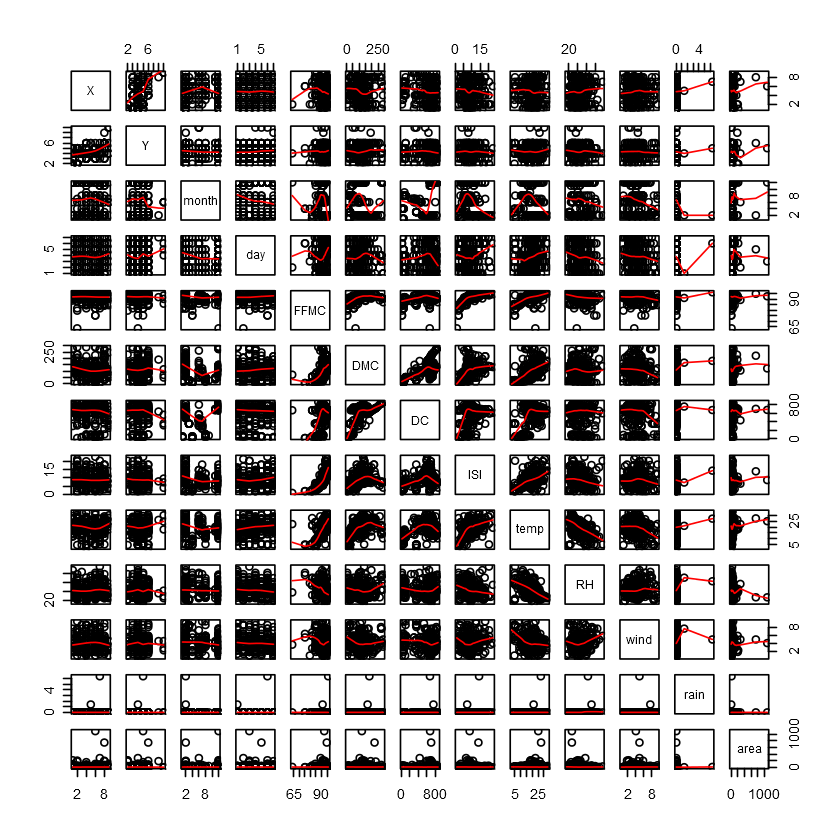

In [14]:
# To find correlation between variables

# for burned area greater than 0
df_area <- df[df$area>0,]
pairs(df_area, panel = panel.smooth)

With this chart it is clear that there is:
* Positive correlation between DC and DMC
* Negative correlation between temp and RH
* Month and day does not have any colinear relationship between any of the other features. 
* We can also see a strong correlation between temperature,DC,DMC,ISI and FFMC. In that case during feature selection, we must use interaction.<br>

For further details we have another correlation plot below.

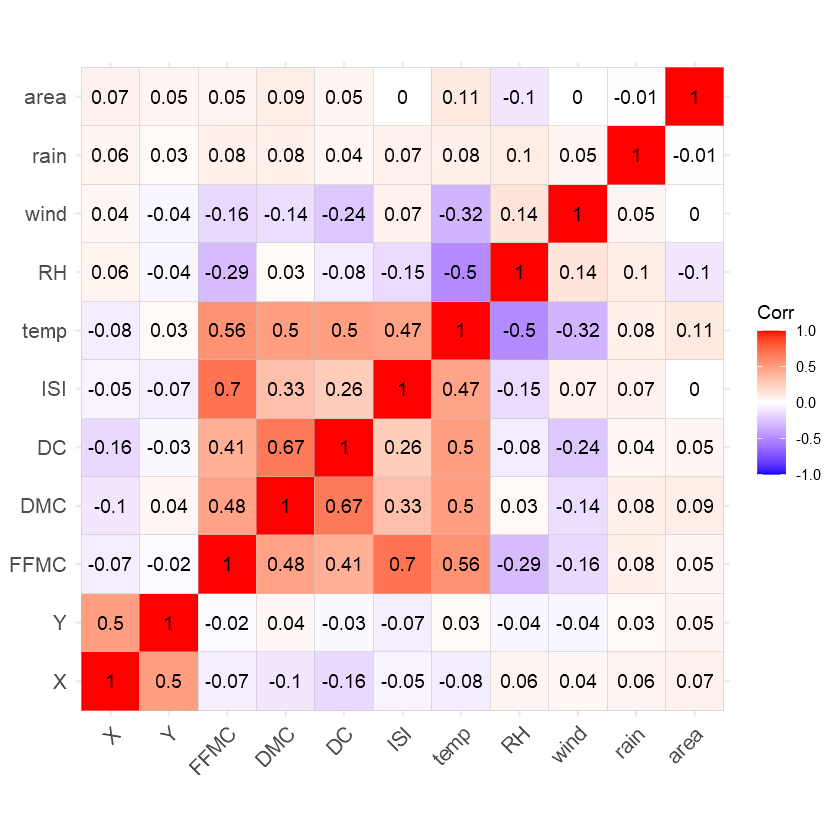

In [15]:
# correlation using better plots
corr <- round(cor(df_area[,c(-3,-4)]), 2)
ggcorrplot(corr,lab =TRUE)

As we said earlier that, we can see correlation between DMC and DC then temp and RH.<br>
As we said above temperature has correlation with FFMC, DMC, DC and ISI and their correlation is proved with this plot also.

## 3. Model Development<a class="anchor" id="sec_3"></a>


When number of features increases, the model complexity increases and also takes more time for training. So we must try different feature selection methods to find correct features for the model. 
At first we are going to use linear model as a part of feature selection, in the linear model we are going to add all the columns as feature and see its summary.

<b>Baseline Model</b>

We are now going to create baseline linear models for feature selection. Here different models are tried and their AIC values, adjusted R squared and p-values are recorded. `month` and `day` are categorical variables and from EDA we know that it has some relation with burned area. So now we are going to convert categorical variables into numericals using dummy variables

In [16]:
# install.packages("dummies")
#adding dummy values for month
fires_df <- cbind(df, dummy(c("month"), data =df))

#adding dummy values for day
fires_df <- cbind(fires_df, dummy(c("day"), data = fires_df))

# removing month and day column
fires_df <- fires_df[,-c(3,4)]

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

<b>Linear model with all columns:(Model:1)</b> `area~ .`<br>
Here model is created with target variable versus all other columns as feature. We are doing this to get a brief idea about different features.


Call:
lm(formula = area ~ ., data = fires_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -55.32  -17.84   -6.82    4.99 1039.28 

Coefficients: (2 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  64.04704   89.13994   0.718  0.47279   
X             2.25583    1.49786   1.506  0.13270   
Y            -0.14765    2.81881  -0.052  0.95825   
FFMC         -0.09527    0.76985  -0.124  0.90156   
DMC           0.20106    0.08681   2.316  0.02097 * 
DC           -0.12880    0.05872  -2.194  0.02874 * 
ISI          -0.54416    0.83105  -0.655  0.51291   
temp          1.29620    1.03082   1.257  0.20919   
RH           -0.13476    0.28845  -0.467  0.64057   
wind          1.97427    1.77824   1.110  0.26744   
rain         -2.81545    9.92647  -0.284  0.77681   
monthapr    -73.73192   42.67672  -1.728  0.08468 . 
monthaug    -26.84987   10.36236  -2.591  0.00985 **
monthdec    -26.35371   33.57509  -0.785  0.43288   
monthfeb

Warning message:
"not plotting observations with leverage one:
  517"Warning message:
"not plotting observations with leverage one:
  517"

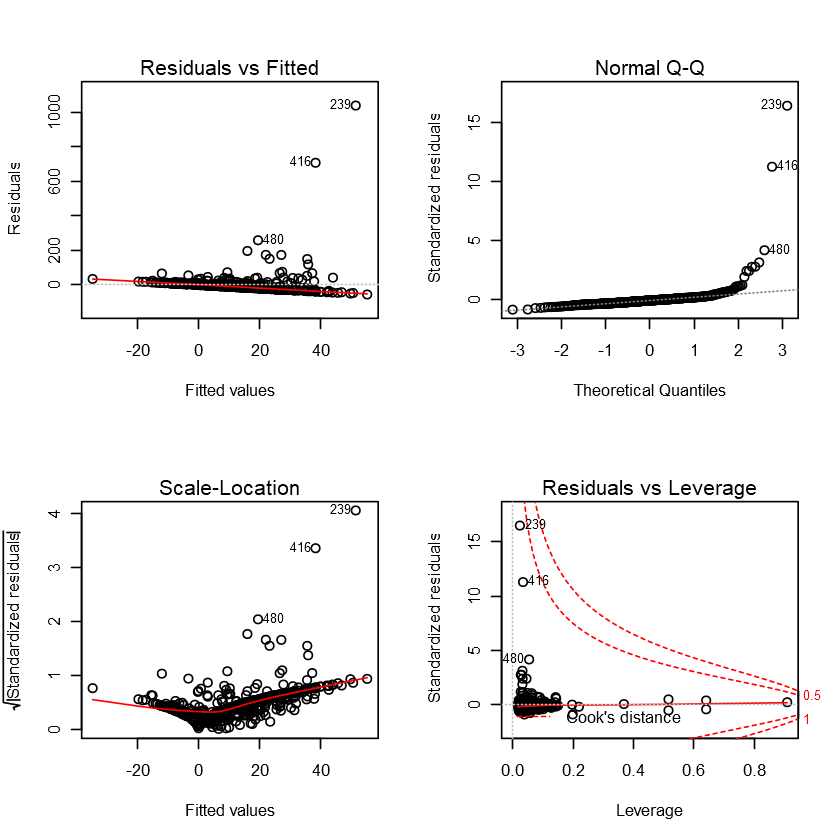

In [17]:
# creating a linear regression model with all the columns
model_1 <- lm(area~ ., data = fires_df)

#printing out the summary
summary(model_1)

par(mfrow=c(2,2))
plot(model_1)

We can see from the summary of our model that the adjusted R-squared values is very low and negative so we need to change our feature list. Residual standard error means difference between predicted and actual values and the error value is high for our model.<br>
* Residual vs Fitted : This plot is used to check linear assumptions. We have to verify that the data points are equally spread over the horizontal line. In this case, more of the data points are shifted towards the upper side so it the predictors and response variable have non-linear relation.
* Normal Q-Q: Q-Q plot is used to check if the residuals are normally distributed. In this case, most of the lines follow the straight line, except some at the last.
* Residual vs Leverage: This plot helps us to find the influential data points. From this plot it is clear that most of the points are within the Cook's distance.
* Scale-location: This plot is used the assumption of equal variance if the residuals are equally spread over the horizontal line. From the above plot we can see that the residuals are not equally distributed.<br>

It is also seen that `F-stats` is less than one and `Adjusted R-squared` value is negative and this model will yeild bad predictions So we need to do our feature selection.<br>
We are going to add one to area where area is zero and after that taking log transformation on area.

In [18]:
fires_df$area <- ifelse(fires_df$area ==0, (fires_df$area +1), fires_df$area)
fires_df$area <- log(fires_df$area)

<b>Linear model with `log(area+1)`(Model2):</b><br>
Here we are going to convert area into log(area+1) and see how the model performs.

In [19]:
# creating a linear regression model with all the columns
model2 <- lm(area~ ., data = fires_df)

#printing out the summary
summary(model2)


Call:
lm(formula = area ~ ., data = fires_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4667 -0.9997 -0.5265  0.8470  5.3099 

Coefficients: (2 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.6927121  1.9832140   0.349  0.72702   
X            0.0464117  0.0333250   1.393  0.16434   
Y           -0.0249918  0.0627138  -0.399  0.69043   
FFMC         0.0062270  0.0171278   0.364  0.71634   
DMC          0.0050334  0.0019314   2.606  0.00944 **
DC          -0.0021826  0.0013064  -1.671  0.09542 . 
ISI         -0.0168697  0.0184894  -0.912  0.36201   
temp         0.0333629  0.0229341   1.455  0.14639   
RH           0.0002462  0.0064175   0.038  0.96942   
wind         0.0601961  0.0395628   1.522  0.12877   
rain         0.0666593  0.2208474   0.302  0.76291   
monthapr    -0.9768165  0.9494853  -1.029  0.30409   
monthaug    -0.7506575  0.2305452  -3.256  0.00121 **
monthdec     1.2346490  0.7469894   1.653  0.09

model2 gives a better adjusted R-squared, p-value and F-statistic than model1. The imporatant features we get here are `DMC`,`DC`,`monthjul`,`monthjun`, `monthaug`,`monthdec`, `monthjul`, `monthjun`

<b>Step function</b><br>
By using step function, we can access the quality of the model by comparing find different models. It makes use of adjusted R-squared value where it penalises for addition any unwanted feature into our model. So now we are going to do step function to validate our results from EDA. From step function, we can get different subsets of data, and their AIC value. We can take the lower AIC feature.

In [20]:
step(model2)

Start:  AIC=390.6
area ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthapr + monthaug + monthdec + monthfeb + monthjan + monthjul + 
    monthjun + monthmar + monthmay + monthnov + monthoct + monthsep + 
    dayfri + daymon + daysat + daysun + daythu + daytue + daywed


Step:  AIC=390.6
area ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthapr + monthaug + monthdec + monthfeb + monthjan + monthjul + 
    monthjun + monthmar + monthmay + monthnov + monthoct + monthsep + 
    dayfri + daymon + daysat + daysun + daythu + daytue


Step:  AIC=390.6
area ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthapr + monthaug + monthdec + monthfeb + monthjan + monthjul + 
    monthjun + monthmar + monthmay + monthnov + monthoct + dayfri + 
    daymon + daysat + daysun + daythu + daytue

           Df Sum of Sq     RSS    AIC
- monthoct  1    0.0000  987.57 388.60
- daymon    1    0.0023  987.57 388.61
- RH        1    0.0030  987.57 388.


Call:
lm(formula = area ~ X + DMC + DC + temp + wind + monthaug + monthdec + 
    monthjul + monthjun + monthmar, data = fires_df)

Coefficients:
(Intercept)            X          DMC           DC         temp         wind  
   0.265058     0.038641     0.004165    -0.000952     0.035341     0.054135  
   monthaug     monthdec     monthjul     monthjun     monthmar  
  -0.603804     1.694833    -0.586568    -0.867090    -0.546026  


The features from the step function are `X`, `DMC`,`DC`,`temp` and `wind`, so we can now try to print models based on step function. So we are going to build features based on these parameters.

<b>Linear regression based on features from step function. (Model3)</b>

In [21]:
# creng a linear regression model with all the columns
model3 <- lm(area~ X + DMC + DC + temp + wind, data = fires_df)

#printing out the summary
summary(model3)


Call:
lm(formula = area ~ X + DMC + DC + temp + wind, data = fires_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5811 -0.9792 -0.7294  0.9280  5.9282 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.2659900  0.3299359   0.806   0.4205  
X           0.0345032  0.0274151   1.259   0.2088  
DMC         0.0007794  0.0013836   0.563   0.5735  
DC          0.0002164  0.0003661   0.591   0.5548  
temp        0.0036922  0.0129817   0.284   0.7762  
wind        0.0651239  0.0365409   1.782   0.0753 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.435 on 511 degrees of freedom
Multiple R-squared:  0.01247,	Adjusted R-squared:  0.002808 
F-statistic: 1.291 on 5 and 511 DF,  p-value: 0.2665


We can see that each time, the model is becoming better. In model 3, the adjusted P-value has increased to a small value, F-statistic has also increased. So we can say that features we got is better. But we should not miss any features so we should try different combinations, now we are going to try features listed in fires.pdf.

<b>Linear Regression based on features from Model2: Model4</b><br>
The features that has importance in Model2 are `DMC`,`DC`,`monthaug`,`monthdec`,`monthjul`,`monthjun` and we are going to modify Model2 based on the summary from Model2 and create a new model based on the important features.

In [22]:
model4 <- lm(area~  DMC +  DC + monthaug+ monthdec+monthjul+monthjun, data = fires_df)

#printing out the summary
summary(model4)


Call:
lm(formula = area ~ DMC + DC + monthaug + monthdec + monthjul + 
    monthjun, data = fires_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3274 -0.9448 -0.6955  0.8153  5.8746 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7704885  0.1628620   4.731  2.9e-06 ***
DMC          0.0035982  0.0015436   2.331 0.020139 *  
DC          -0.0001276  0.0003607  -0.354 0.723567    
monthaug    -0.3916111  0.1577013  -2.483 0.013339 *  
monthdec     1.6643394  0.4849643   3.432 0.000648 ***
monthjul    -0.2156909  0.2707925  -0.797 0.426102    
monthjun    -0.3736363  0.3649069  -1.024 0.306357    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.417 on 510 degrees of freedom
Multiple R-squared:  0.039,	Adjusted R-squared:  0.0277 
F-statistic:  3.45 on 6 and 510 DF,  p-value: 0.00238


We can see that adjusted R-squared value and all other values are almost similar Model2

<b>Subset Regression Approach</b><br>
In subset regression approach that consists of testing all possible combinations of predicates on models and returns the best model according to some statistical criteria.<br>
Here we use `leaps` library and `regsubsets` package to find different combinations. And its summary is taken using `summary` function.


In [23]:
# subset selection
# install.packages("leaps")
library(leaps)
r_full = regsubsets(area~., data = fires_df,nvmax = 30)

reg_summary = summary(r_full)

reg_summary

Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"2  linear dependencies found"

Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(area ~ ., data = fires_df, nvmax = 30)
29 Variables  (and intercept)
         Forced in Forced out
X            FALSE      FALSE
Y            FALSE      FALSE
FFMC         FALSE      FALSE
DMC          FALSE      FALSE
DC           FALSE      FALSE
ISI          FALSE      FALSE
temp         FALSE      FALSE
RH           FALSE      FALSE
wind         FALSE      FALSE
rain         FALSE      FALSE
monthapr     FALSE      FALSE
monthaug     FALSE      FALSE
monthdec     FALSE      FALSE
monthfeb     FALSE      FALSE
monthjan     FALSE      FALSE
monthjul     FALSE      FALSE
monthjun     FALSE      FALSE
monthmar     FALSE      FALSE
monthmay     FALSE      FALSE
monthnov     FALSE      FALSE
monthoct     FALSE      FALSE
dayfri       FALSE      FALSE
daymon       FALSE      FALSE
daysat       FALSE      FALSE
daysun       FALSE      FALSE
daythu       FALSE      FALSE
daytue       FALSE      FALSE
monthsep     FALSE      FALSE
daywed      

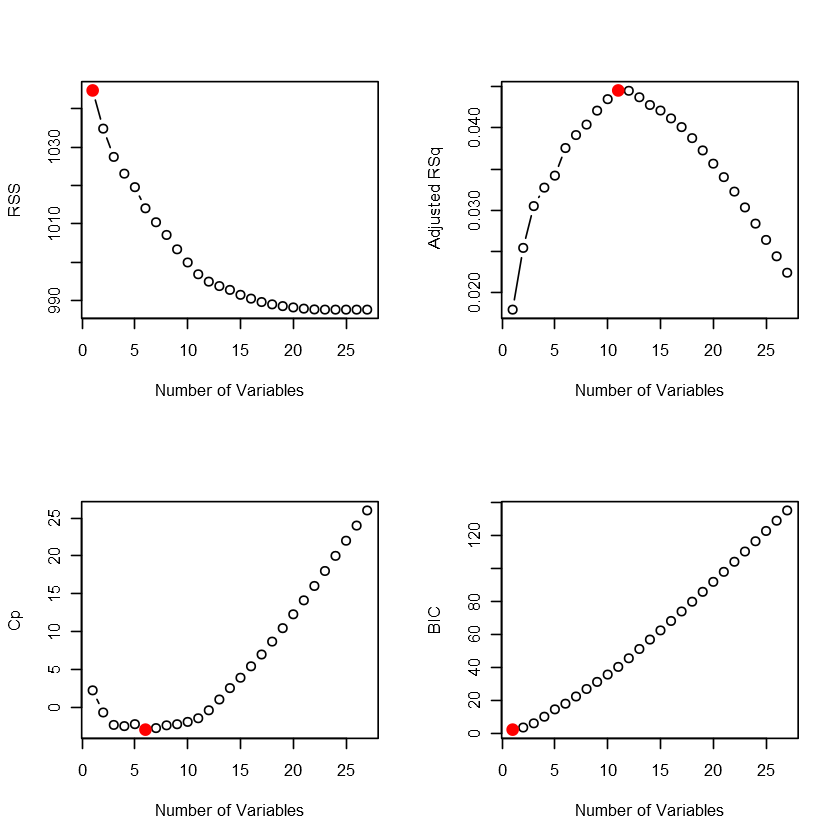

In [24]:
# ploting different values of rss, adjusted rsquared, bic versus number of variables.

par(mfrow = c(2, 2))

plot(reg_summary$rss, xlab = "Number of Variables", ylab = "RSS", type = "b")

best_rss = which.max(reg_summary$rss)

points(best_rss, reg_summary$rss[best_rss],
       col = "red",cex = 2, pch = 20)

plot(reg_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "b")

best_adj_r2 = which.max(reg_summary$adjr2)

points(best_adj_r2, reg_summary$adjr2[best_adj_r2],
       col = "red",cex = 2, pch = 20)

plot(reg_summary$cp, xlab = "Number of Variables", ylab = "Cp", type = 'b')

best_cp = which.min(reg_summary$cp)

points(best_cp, reg_summary$cp[best_cp], 
       col = "red", cex = 2, pch = 20)

plot(reg_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = 'b')

best_bic = which.min(reg_summary$bic)

points(best_bic, reg_summary$bic[best_bic], 
       col = "red", cex = 2, pch = 20)

From this plot, we have to take variables where adjusted-R squared value is max, and the corresponding number of variables is taken, which is 10. We can get the coefficients using `coef` function.

In [25]:
coef(r_full, 10)

(Intercept)             X           DMC            DC          temp 
 0.0206266332  0.0352749110  0.0013527057  0.0001636727  0.0179353528 
         wind      monthdec      monthfeb      monthoct        dayfri 
 0.0460737900  1.8182801936  0.4755805821  0.0518526816 -0.1830119559 
       daymon 
-0.0481988770

`X`,`DMC`,`DC`,`temp`,`wind`,`monthdec`,`monthsep` important columns from subset selection.

<b>Linear Model 5</b><br>
We are now going to make model based on the features that we got from subset selection.<br> Square root transformation is done for `rain` and interaction for `DMC` and `temp`. Because we have already seen in EDA that rain in skewed and it is converted into normal distribution using square root transformation.<br> And in correlation plot we have seen that there is a high positive relationship between `DMC` and `temp` so in that case i have removed `DMC` and added `DMC:temp`. 

In [26]:
# summary(update(model2,. ~ . - DMC -DC + DMC:DC + log(DC) + temp:DMC + sqrt(wind)- wind))
# creating a linear regression model with all the columns
model5 <- lm(area~ DMC:temp+ DC+ monthsep+ monthoct  + monthdec + X + temp + sqrt(wind)   , data = fires_df)

#printing out the summary
summary(model5)


Call:
lm(formula = area ~ DMC:temp + DC + monthsep + monthoct + monthdec + 
    X + temp + sqrt(wind), data = fires_df)

Residuals:
   Min     1Q Median     3Q    Max 
-3.529 -0.960 -0.560  0.836  5.528 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.832e-01  4.282e-01   0.428 0.668921    
DC          -1.160e-03  4.774e-04  -2.429 0.015470 *  
monthsep     6.775e-01  1.923e-01   3.524 0.000464 ***
monthoct     7.058e-01  4.301e-01   1.641 0.101408    
monthdec     1.945e+00  5.165e-01   3.766 0.000185 ***
X            3.750e-02  2.699e-02   1.390 0.165261    
temp         2.702e-03  1.627e-02   0.166 0.868131    
sqrt(wind)   2.010e-01  1.433e-01   1.402 0.161395    
DMC:temp     2.280e-04  7.865e-05   2.900 0.003897 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.405 on 508 degrees of freedom
Multiple R-squared:  0.05915,	Adjusted R-squared:  0.04433 
F-statistic: 3.992 on 8 and 508 DF,  p-value:

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In this part we are going to compare three models, `Linear Model`, `Random Forest` and `SVM` with the features that we got from Model development.

In [27]:
# Converting data into test(20%) and train(80%) 

#setting seed value
set.seed(1000)


smp_size <- floor(0.80 * nrow(fires_df))

train_ind <- sample(seq_len(nrow(fires_df)), size = smp_size)

train_df <- fires_df[train_ind, ]

test_df <- fires_df[-train_ind,]

dim(train_df)
dim(test_df)

[1] 413  30

[1] 104  30

<b>1. Linear Regression</b>

In [28]:
lm_model <- lm(area ~ DMC:temp+ DC+ monthsep+ monthoct  + monthdec + X + temp + sqrt(wind), data = fires_df )
# summary(lm_model)

In [29]:
# prediction of lm_model

pred <- predict(lm_model, newdata = test_df)

# rmse value for linear model
paste("RMSE value for Linear Model:",round(RMSE(pred, test_df$area),3))
paste("R2 squared value for Linear Model:",round(R2(pred, test_df$area),3))

[1] "RMSE value for Linear Model: 1.335"

[1] "R2 squared value for Linear Model: 0.081"

<b>2. Random Forest</b>

In [30]:
# taking square root of wind data
fires_df$wind <- sqrt(fires_df$wind)

In [31]:
rf_model <- randomForest(area ~ DMC:temp + DC + monthsep+ monthoct  + monthdec + X + temp + wind, data = fires_df, importance = TRUE, ntree = 500, mtry = 6)

In [32]:
#predicting values for random forest
pred <- predict(rf_model, newdata = test_df)

# printing the values
paste("RMSE value for Random Forest Model:",round(RMSE(pred, test_df$area),3))
paste("R2 squared value for Random Forest Model:",round(R2(pred, test_df$area),3))

[1] "RMSE value for Random Forest Model: 1.157"

[1] "R2 squared value for Random Forest Model: 0.586"

The variable importance plot gives us different values for features based on significance

,%IncMSE,IncNodePurity
DC,14.165701,176.46804
monthsep,9.922028,18.35291
monthoct,-1.427534,2.54040
monthdec,11.844552,11.07302
X,-1.976055,119.59065
temp,7.920364,280.95288
wind,3.143109,139.06370
DMC,11.009754,190.38007


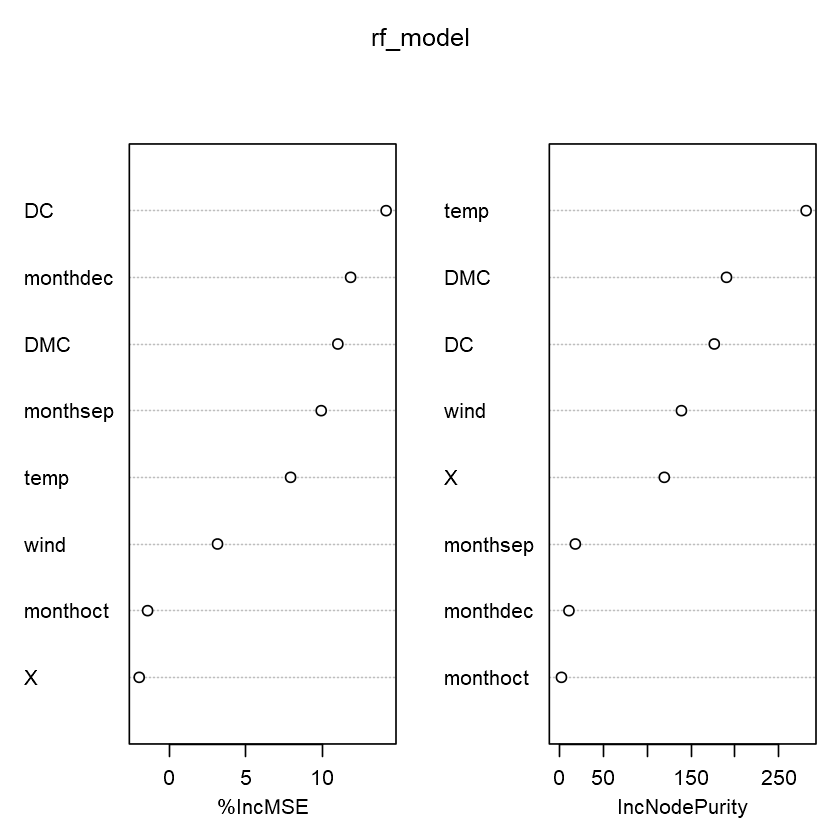

In [33]:
# To check important variables in Random Forest
importance(rf_model)        
varImpPlot(rf_model)       

 <b>3 .SVM Regressor</b>

In [34]:
# install.packages("e1071")
modelsvm = svm(area ~ DMC:temp + DC + monthsep+ monthoct  + monthdec + X + temp + wind, data = fires_df)

# prediction
prediction = predict(modelsvm, fires_df)

#Calculation of RMSE
RMSE(prediction, test_df$area)

paste("RMSE value for SVM Model:",round(RMSE(prediction, test_df$area),3))

Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"

[1] 1.480237

Warning message in pred - obs:
"longer object length is not a multiple of shorter object length"

[1] "RMSE value for SVM Model: 1.48"

         | Linear Model | Random Forest | SVM |
           ------------   -------------   ----
    rmse      1.40           1.35        1.48
    
We can see that the rmse value for linear model is lower than Random Forest and SVM. And so we can say that Random Model is better than linear and SVM.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

Inorder to find key factors or features which can be used to predict the burned areas are `DMC`,`temp`, `DC` ,` monthsep`, `monthoct` ,`monthdec`, ` X` ,`temp` ,` wind`. To reach this state, we have used `EDA`, `step function`, `subset regression approach` and for each model `adjusted R-squared value`, `P-value`, `F-statistic` values are been used.<br>

The information we have are been collected from:<br>
<b>EDA</b><br>
From EDA we came to know about the distribution of different columns, by knowing the distribution we added required transformations to make it a normal distribution. Temp, DMC and DC are possitely correlated.<br>


<b>Baseline Models</b><br>
The baseline models we used are linear models, where different paramters are tried out. `step`functions are used to find different combinations of features based on AIC value. With that we further made models and looking at the `adjusted R-squared value` , `p- value`and`F-stats` we can find the significants of each feature with the model.<br>


<b>Subset Regression Approach</b><br>
By using subset regression approach, we can find best model with different combinations of labels. By making use of the labels from that, we created final model and implimenting the transfomation and interaction ideas from EDA. Where the final baseline model has<br> `Residual standard error: 1.405 on 508 degrees of freedom
Multiple R-squared:  0.05915,	Adjusted R-squared:  0.04433 
F-statistic: 3.992 on 8 and 508 DF,  p-value: 0.0001319`<br>


## 6. Conclusion <a class="anchor" id="sec_6"></a>

In this assignment for the prediction of burned area, we have created three models `Random Forest`, `SVM`and `linear Model`.Out of that Random forest has the least root mean squared error and it will be a better model to predict. The dataset consists of 13 observations. The burned area is recorded as zero in most of the records, and the distributions of columns are all mixed with positive and negative skewness. There are no outlliers or missing values in the dataset. After Data exploration, where correlation, colinearity is found between features as well as with the target variable. <br>

After that baseline models are made to make clarity of our assumptions from EDA, in baseline models we took the help of step function and subset regression approach to find different combinations and along with our findings from EDA results in a good model which yields a less rmse valued model. The models are divided into test and train with a ratio of 20-80 as specified as in the assignment. 

## 7. References <a class="anchor" id="sec_7"></a>

* https://daviddalpiaz.github.io/r4sl/subset-selection.html#rmarkdown-11
* http://www.columbia.edu/~yh2693/ForestFire.html
* https://www.kaggle.com/elikplim/predict-the-burned-area-of-forest-fires
* http://www3.dsi.uminho.pt/pcortez/fires.pdf